## Import the required libraries

In [31]:
import os
import zipfile
import os, warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import gridspec

import random
import numpy as np
import tensorflow as tf

#from random import randint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import image_dataset_from_directory, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense , Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


Unsip the files

In [32]:
import zipfile

zip_files = ['test', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test unzipped
train unzipped


In [33]:
Train_Folder_Path = "train"
Test_Folder_Path = "test"
train_file_names = os.listdir(Train_Folder_Path)
test_file_names = os.listdir(Test_Folder_Path)

In [34]:
targets = []
full_paths = []
for file_name in train_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(Train_Folder_Path, file_name)
    full_paths.append(full_path)
    targets.append(target)
train_df = pd.DataFrame()
train_df['image_path'] = full_paths
train_df['target'] = targets

full_paths = []
for file_name in test_file_names:
    target = file_name.split(".")[0]
    full_path = os.path.join(Test_Folder_Path, file_name)
    full_paths.append(full_path)
test_df = pd.DataFrame()
test_df['image_path'] = full_paths

In [ ]:
test_label = []
a = os.listdir("../working/test")
for i in range(len(a)):
    test_label.append(a[i].split(".")[0])
test_label[0:5]

## Visualize the data

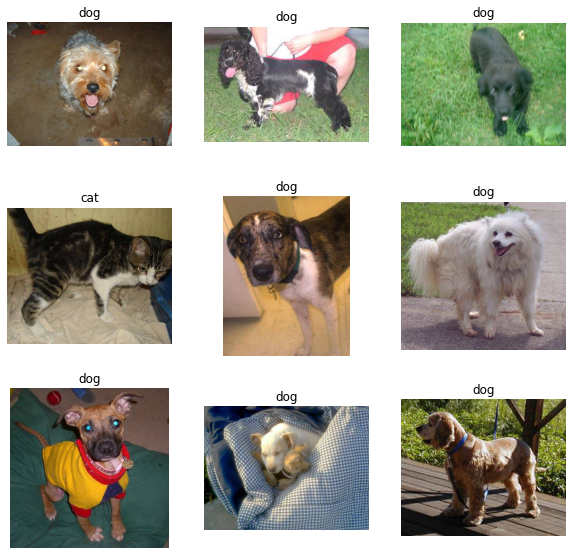

In [35]:
class_names = ["cat", "dog"]

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    j = random.randint(0, 25000)
    plt.imshow(img.imread(train_df.iloc[j,0]))
    plt.title(train_df.iloc[j,1])
    plt.axis('off')
plt.show()



Split the data

In [36]:
train_data,val_data = train_test_split(train_df,random_state=234)

In [37]:
np.random.seed(1234)

# If you run into memory errors, try reducing this
batch_size = 32

train_datagen = ImageDataGenerator()
train_data_generator = train_datagen.flow_from_dataframe(dataframe=train_data,x_col='image_path',y_col='target',
                                                  target_size=(150,150),class_mode='binary',batch_size=batch_size,shuffle=False)

val_datagen = ImageDataGenerator()
val_data_generator = val_datagen.flow_from_dataframe(dataframe=val_data,x_col='image_path',y_col='target',
                                                  target_size=(150,150),class_mode='binary',batch_size=batch_size,shuffle=False)

test_datagen = ImageDataGenerator()
test_data_generator = test_datagen.flow_from_dataframe(dataframe=test_df,x_col='image_path',y_col=None,
                                                  target_size=(150,150),class_mode=None,batch_size=batch_size,shuffle=False)                                     

Found 18750 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.


## Define the model

In [41]:
model = Sequential([  
    Flatten(input_shape=(150,150,3)),
    BatchNormalization(),
    Dense(100, activation='leaky_relu'),
    BatchNormalization(),
    Dense(20, activation='leaky_relu'),
    BatchNormalization(),
    #LeakyReLU(),
    Dense(1, activation='sigmoid')
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 67500)            270000    
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 100)               6750100   
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 batch_normalization_5 (Batc  (None, 20)              

## Train

In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    train_data_generator,
    validation_data=val_data_generator,
    epochs=200,
    callbacks=[early_stopping],verbose=1
)

Epoch 1/200
586/586 [==============================] - 96s 162ms/step - loss: 0.6687 - binary_accuracy: 0.5993 - val_loss: 0.6397 - val_binary_accuracy: 0.6267
Epoch 2/200
586/586 [==============================] - 94s 160ms/step - loss: 0.6245 - binary_accuracy: 0.6516 - val_loss: 0.6314 - val_binary_accuracy: 0.6314
Epoch 3/200
586/586 [==============================] - 95s 161ms/step - loss: 0.5937 - binary_accuracy: 0.6790 - val_loss: 0.6322 - val_binary_accuracy: 0.6341
Epoch 4/200
586/586 [==============================] - 93s 159ms/step - loss: 0.5662 - binary_accuracy: 0.7030 - val_loss: 0.6387 - val_binary_accuracy: 0.6430
Epoch 5/200
586/586 [==============================] - 92s 158ms/step - loss: 0.5359 - binary_accuracy: 0.7269 - val_loss: 0.6312 - val_binary_accuracy: 0.6472
Epoch 6/200
586/586 [==============================] - 93s 158ms/step - loss: 0.5020 - binary_accuracy: 0.7527 - val_loss: 0.6560 - val_binary_accuracy: 0.6438
Epoch 7/200
586/586 [===================

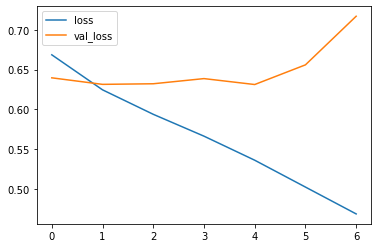

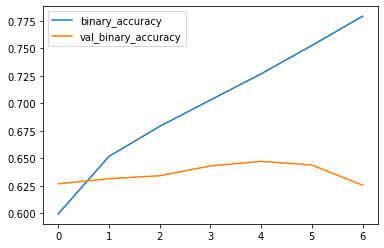

In [44]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [43]:
score=model.evaluate(val_data_generator)
print(score[1])

196/196 [==============================] - 13s 65ms/step - loss: 0.6314 - binary_accuracy: 0.6314
0.6313599944114685


In [ ]:
predictions = model.predict(test_data_generator)

In [46]:
output = pd.DataFrame({'id': test_label, 'label': np.round(predictions).flatten().astype(int)})
output.to_csv('submission_MLP.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'test_id' is not defined